We are going to run an electromagnetic simulation, with initial code and ideas borrowed from
 * Understanding the Finite-Difference Time-Domain Method, John B. Schneider, http://www.eecs.wsu.edu/~schneidj/ufdtd, 2010.
 
We're going to run a simple, bare-bones 1D FDTD simulation with a hard source.

The impedance of free space (or vacuum) is 377.0.

We are going to model 400 mm of space, and run the simulation for 500 time units.

We use a time step that matches the space step with a Courant number of 1, which means that $c * dt / dx = 1$, where c is the speed of light.  Given that $c$ is 299,792,458 m/s and our space step ($dx$) is 1 mm, our time step ($dt$) is $dx / c$ or $3.33*10^{-12}$ s. (Don't worry about this if it doesn't make sense - read more in an FDTD book if you want to.)

Our source is the electric field at the left edge of the grid.
We use a Gaussian source that peaks at 30 time units and has a standard deviation of 7.

Our output will be the electric field measured at 250 mm over the time of the simulation.


In [1]:
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


imp0 = 377.0 # property of free space (vacuum)
SIZE = 400 # dimension of space to model
sensorLocation = 250 # location of output sensor
maxTime = 700 # simulation time

sourcePeakTime = 30 # peak of the Gaussian source
sourceSdv = 7 # standard deviation of the Gaussian source
sourceSigma = 2 * sourceSdv**2

We first initialize lists for the electric and magnetic field components.

We then start at time 0, and update the magnetic fields at time 0.5 based on the magnetic fields at time -0.5 and the electric fields at time 0.  And then we update the electric fields at time 1 based on the electric field at time 0 and the magnetic field at time 0.5. At the left edge of the grid, we set the source electric field.  And we write out the electric field at the sensor location.

We then repeat this for each time step, until the set number of time steps have been reached.

In [2]:
ez = [0.0] * SIZE
hy = [0.0] * SIZE

# do time stepping
for n in range(maxTime):

    # update magnetic field
    for i in range(SIZE-1):
        hy[i] = hy[i] + (ez[i + 1] - ez[i]) / imp0

    # update electric field
    for i in range(SIZE):
        ez[i] = ez[i] + (hy[i] - hy[i - 1]) * imp0

    # hardwire a source node */
    if n < sourceSigma:
        ez[0] = math.exp(-(n - sourcePeakTime)**2 / sourceSigma)
    else:
    ## PEC Boundaries
        ez[0] = 0.0
        ez[(SIZE - 1)] = 0.0

    print(ez[sensorLocation])
#done with time stepping loop

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


Instead of printing the output electric field values at the sensor, let's save them to a list and then plot them

In [3]:
ez = [0.0] * SIZE
hy = [0.0] * SIZE
output = [0.0] * maxTime

epsR = [1.0] * SIZE

# do time stepping
for n in range(maxTime):

    # update magnetic field
    for i in range(SIZE-1):
        hy[i] = hy[i] + (ez[i + 1] - ez[i]) / imp0

    # update electric field
    for i in range(SIZE):
        ez[i] = ez[i] + (hy[i] - hy[i - 1]) * imp0 / epsR[i]

    # hardwire a source node */
    if n < sourceSigma:
        ez[0] = math.exp(-(n - sourcePeakTime)**2 / sourceSigma)
    else:
    ## PEC Boundaries
        ez[0] = 0.0
        ez[(SIZE-1)] = 0.0

    output[n] = ez[sensorLocation]
#done with time stepping loop

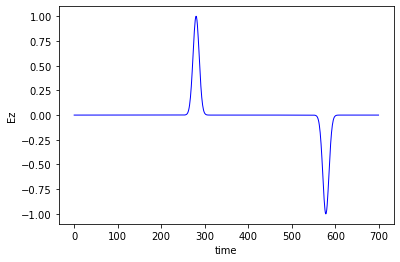

In [4]:

plt.plot(range(maxTime), output, color='blue', linewidth=1)
plt.xlabel('time')
plt.ylabel('Ez')
plt.show()



Now let's put in a slab of glass that's 50 mm thick, located betweeen 150 and 200 mm in our grid.  The relative permittivity of glass (pyrex) is 4.7

In [5]:
# set up glass slab
for i in range(150,200):
    epsR[i] = 4.7

and rerun the code, storing the output in output2 this time

In [6]:
ez = [0.0] * SIZE
hy = [0.0] * SIZE
output2 = [0.0] * maxTime

# do time stepping
for n in range(maxTime):

    # update magnetic field
    for i in range(SIZE-1):
        hy[i] = hy[i] + (ez[i + 1] - ez[i]) / imp0

    # update electric field
    for i in range(SIZE):
        ez[i] = ez[i] + (hy[i] - hy[i - 1]) * imp0 / epsR[i]

    # hardwire a source node */
    if n < sourceSigma:
        ez[0] = math.exp(-(n - sourcePeakTime)**2 / sourceSigma)
    else:
    ## PEC Boundaries
        ez[0] = 0.0
        ez[(SIZE-1)] = 0.0

    output2[n] = ez[sensorLocation]
#done with time stepping loop

Now let's plot the two outputs, for free space in blue and with a glass slab in green 

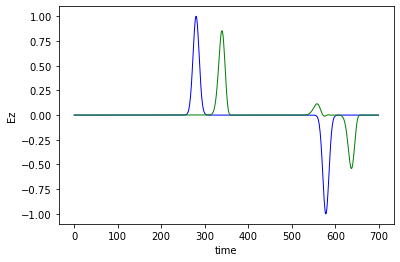

In [7]:
plt.plot(range(maxTime), output, color='blue', linewidth=1)
plt.plot(range(maxTime), output2, color='green', linewidth=1)
plt.xlabel('time')
plt.ylabel('Ez')
plt.show()

You can see that the second (green) curve has been reduced in height and has been delayed by passing through the glass slab.  The reduction in height is a property of going from one material to another - some energy is reflected by at the interface between the two materials. The delay is a property of the glass itself - waves travel more slowly in glass than in vaccum.

Let's see what's happening by visualizing the Ez field over the simulation, first with no slab

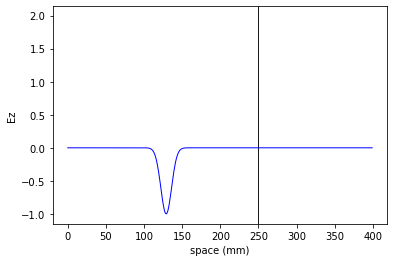

In [8]:
ims = []   

# set up a plot
fig, ax = plt.subplots()
ax.axvspan(250, 250, alpha=0.9, color='black') # sensor
ax.set_xlabel('space (mm)')
ax.set_ylabel('Ez')


ez = [0.0] * SIZE
hy = [0.0] * SIZE

# free space
epsR = [1.0] * SIZE

# do time stepping
for n in range(maxTime):

    # update magnetic field
    for i in range(SIZE-1):
        hy[i] = hy[i] + (ez[i + 1] - ez[i]) / imp0

    # update electric field
    for i in range(SIZE):
        ez[i] = ez[i] + (hy[i] - hy[i - 1]) * imp0 / epsR[i]
    # capture a snapshot of the ez field at this timestep to the animation
    ims.append((plt.plot(range(SIZE), ez, color='blue', linewidth=1)))

    # hardwire a source node */
    if n < sourceSigma:
        ez[0] = math.exp(-(n - sourcePeakTime)**2 / sourceSigma)
    else:
    ## PEC Boundaries
        ez[0] = 0.0
        ez[(SIZE-1)] = 0.0

#done with time stepping loop

#build and display the animation
im_ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=5000, blit=True)
HTML(im_ani.to_jshtml())

# # # Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=50, metadata=dict(artist='Me'), bitrate=2000)
im_ani.save('fdtd_PEC.mp4', writer=writer,dpi=600)




and then with a glass slab

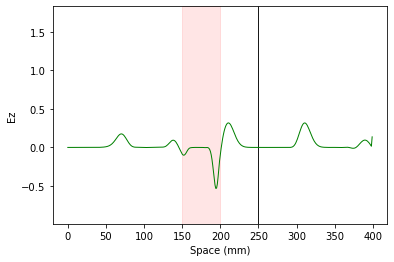

In [9]:
ims = []   

# set up a plot
fig, ax = plt.subplots()
ax.axvspan(150, 200, alpha=0.1, color='red') # glass slab
ax.axvspan(250, 250, alpha=0.9, color='black') # sensor
ax.set_xlabel('Space (mm)')
ax.set_ylabel('Ez')


ez = [0.0] * SIZE
hy = [0.0] * SIZE

# free space
epsR = [1.0] * SIZE

# add a glass slab
for i in range(150,200):
    epsR[i] = 4.7


# do time stepping
for n in range(maxTime):

    # update magnetic field
    for i in range(SIZE-1):
        hy[i] = hy[i] + (ez[i + 1] - ez[i]) / imp0

    # update electric field
    for i in range(SIZE):
        ez[i] = ez[i] + (hy[i] - hy[i - 1]) * imp0 / epsR[i]
    # capture a snapshot of the ez field at this timestep to the animation
    ims.append((plt.plot(range(SIZE), ez, color='green', linewidth=1)))

    # hardwire a source node */
    if n < sourceSigma:
        ez[0] = math.exp(-(n - sourcePeakTime)**2 / sourceSigma)
    else:
        ## PEC Boundaries
        ez[0] = 0.0
        ez[(SIZE-1)] = 0.0 

#done with time stepping loop

#build and display the animation
im_ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=5000, blit=True)
HTML(im_ani.to_jshtml())

writer = Writer(fps=60, metadata=dict(artist='Me'), bitrate=2000)
im_ani.save('reflection_PEC.mp4', writer=writer,dpi=600)


Now let's look at this numerically, not graphically.  Let's calculate the sum of the electric field that passed through free space and compare it to the sum of the electric field that passed through the glass slab.  The ratio is the transmission, and the part of the field that didn't pass through the slab was reflected, and is the reflectance

In [10]:
base = 0
transmitted = 0
for n in range(maxTime):
    base += output[n]
    transmitted += output2[n]
transmission = transmitted/base
print('Transmission =',transmission)
print('Reflectance =', (1 - transmission))

Transmission = 8723169855819118.0
Reflectance = -8723169855819117.0


What if we run the simulation for one more time step?  Remember that the source is turned off after sourceSigma time steps, so this does not inject any more energy into the simulation.

In [11]:
newMaxTime = 501 # simulation time

ez = [0.0] * SIZE
hy = [0.0] * SIZE
output3 = [0.0] * newMaxTime

# free space
epsR = [1.0] * SIZE

# do time stepping
for n in range(newMaxTime):

    # update magnetic field
    for i in range(SIZE-1):
        hy[i] = hy[i] + (ez[i + 1] - ez[i]) / imp0

    # update electric field
    for i in range(SIZE):
        ez[i] = ez[i] + (hy[i] - hy[i - 1]) * imp0 / epsR[i]

    # hardwire a source node */
    if n < sourceSigma:
        ez[0] = math.exp(-(n - sourcePeakTime)**2 / sourceSigma)
    else:
        ez[0] = 0.0
        ez[(SIZE-1)] = 0.0

    output3[n] = ez[sensorLocation]
#done with time stepping loop


ez = [0.0] * SIZE
hy = [0.0] * SIZE
output4 = [0.0] * newMaxTime

# add a glass slab
for i in range(150,200):
    epsR[i] = 4.7

# do time stepping
for n in range(newMaxTime):

    # update magnetic field
    for i in range(SIZE-1):
        hy[i] = hy[i] + (ez[i + 1] - ez[i]) / imp0

    # update electric field
    for i in range(SIZE):
        ez[i] = ez[i] + (hy[i] - hy[i - 1]) * imp0 / epsR[i]

    # hardwire a source node */
    if n < sourceSigma:
        ez[0] = math.exp(-(n - sourcePeakTime)**2 / sourceSigma)
    else:
        ez[0] = 0.0
        ez[(SIZE-1)] = 0.0

    output4[n] = ez[sensorLocation]
#done with time stepping loop

Let's calculate transmission and reflectance again - they should be the same.

In [12]:
base2 = 0
transmitted2 = 0
for n in range(newMaxTime):
    base2 += output3[n]
    transmitted2 += output4[n]
transmission2 = transmitted2/base2
print('Transmission2 =',transmission2)
print('Reflectance2 =', (1 - transmission2))

Transmission2 = 0.8640775949984995
Reflectance2 = 0.13592240500150055


Are they the same?

In [13]:
print('Transmission =',transmission)
print('Reflectance =', (1 - transmission))

Transmission = 8723169855819118.0
Reflectance = -8723169855819117.0


Not quite.  How different are they?

In [14]:
difference = (transmission2 - transmission) / transmission
print(difference)

-0.9999999999999999
